In [1]:
import random
import copy
import math as mt

import numpy as np

from numba import jit, njit, cuda, prange

import matplotlib.pyplot as plt

# N-1D Random Walkers With Python & Numba - Difussion Across A Synapse

$t = \frac{L^{2}}{D}$ <br>
$D$: Difussion Coefficient $(\mu m^{2}/s)$ <br>
$L$: Length $(\mu m)$ <br>
$t$: Time $(s)$

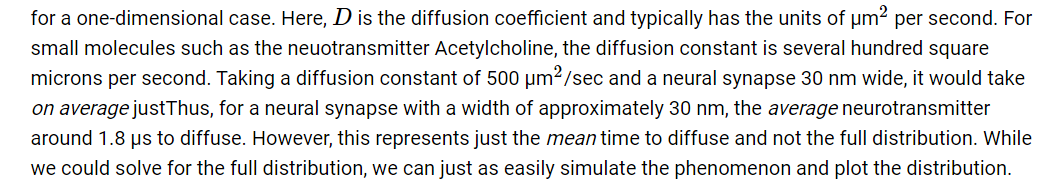

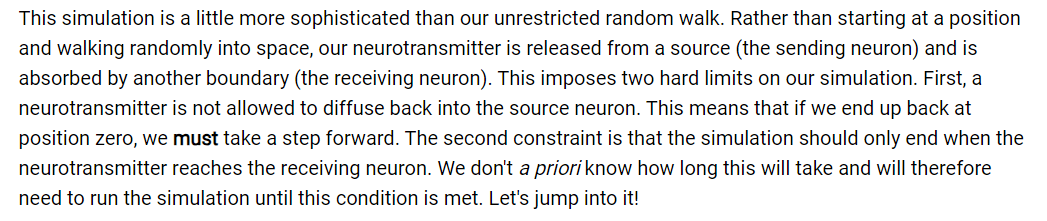

In [5]:
def random_walkers(walkers, D, L, dt):

    L_dt = mt.sqrt(D*dt) # Average Distance Traveled Per Time Step
    length = int(L/L_dt) # Steps to cross the whole synapse
    
    walkers = int(walkers)
    
    random_walks = []
    steps_to_cross_synapse = []
    
    for j in range(walkers):
    
        x = 0
        X = [0]
    
        i = 0
        T = [0]
        
        while x < length:
            i += 1
            T.append(i)
    
            if x == 0:
                x += 1
            else:
                rand = random.uniform(0, 1) - 0.5
                rand /= abs(rand)
                
                x += rand
            
            X.append(x)
        
        random_walks.append([T, X])
        steps_to_cross_synapse.append(i)

    return random_walks, steps_to_cross_synapse

In [6]:
D = 500 # Diffusion Constant
L = 0.03 # Width Of The Neurotransmitter
dt = 1e-9 # Time-Step In Nanoseconds

walkers = 1e4

In [7]:
random_walks, steps_to_cross_synapse = random_walkers(walkers, D, L, dt)

In [8]:
steps_to_cross_synapse = np.array(steps_to_cross_synapse)
time_to_cross_synapse = steps_to_cross_synapse*dt*(1e6)
print(f"On average it took {np.round(np.mean(time_to_cross_synapse), 3)} microseconds to cross the synapse")

On average it took 1.761 microseconds to cross the synapse


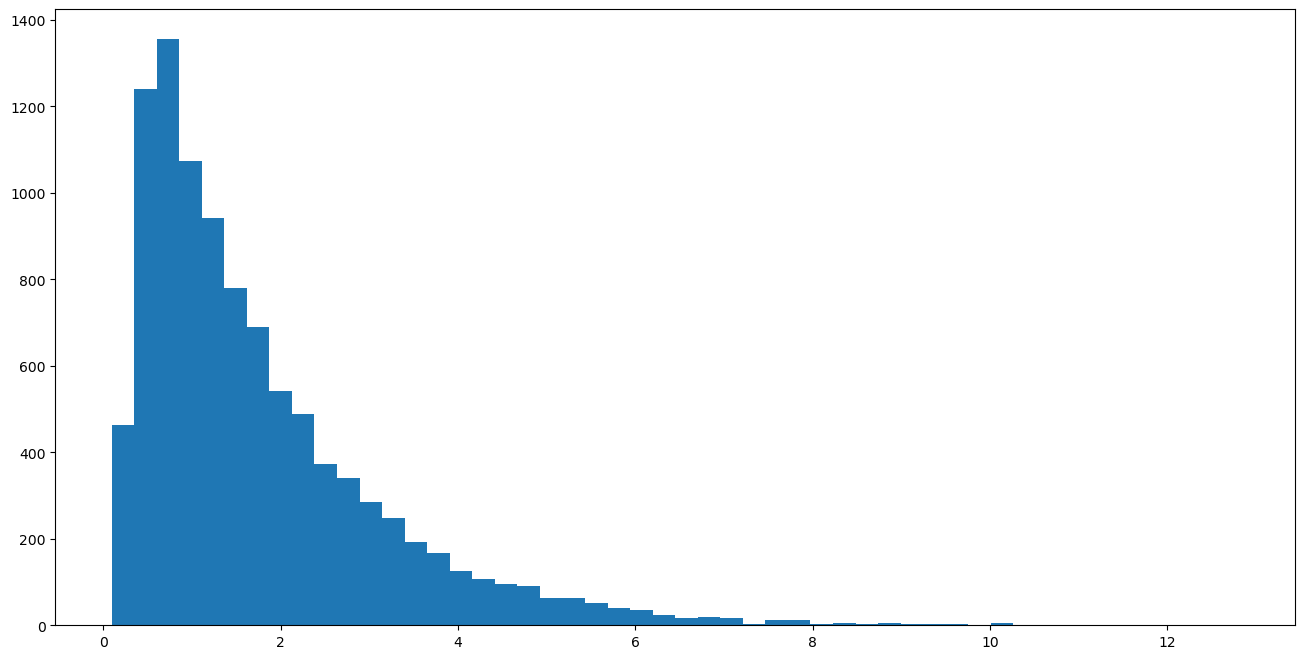

In [9]:
plt.figure(figsize=(16, 8))
plt.hist(time_to_cross_synapse, bins=50)
plt.show()

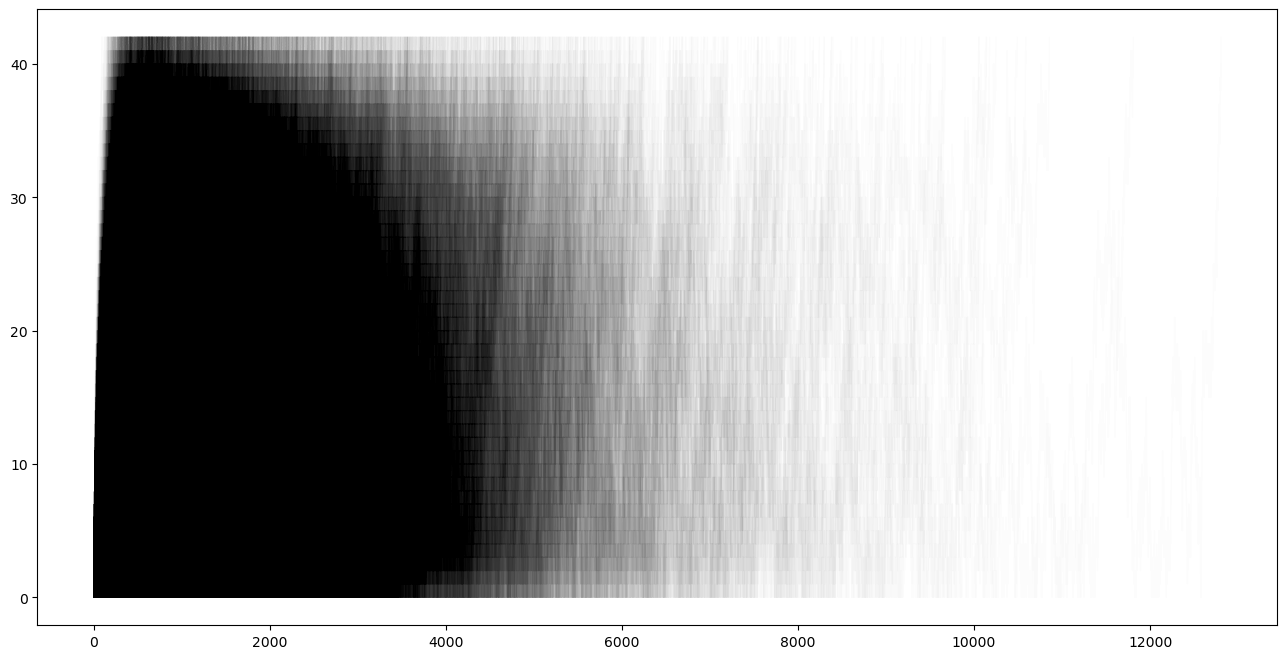

In [10]:
plt.figure(figsize=(16, 8))

for i in range(int(walkers)):
    plt.plot(random_walks[i][0], random_walks[i][1], c='k', linewidth=1, alpha=0.01)

plt.show()